# Load prediction of CT1 based on Ambient Conditions
### by analysis of ambient condition, deduce the ideal load of the machine using previous data
5 year data  
convert into single df  
part data into 80:20 ratio (80% training data and 20% test data)

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
#from pandas import ExcelWriter
#from pandas import ExcelFile
df = pd.read_excel('data/Ops Monthly Returns 2016.xls',
                   #skiprows = [0,1,3,4],            
                   #skipfooter= 48, #Number of rows to skip from bottom
                   usecols= "B:F", #Column index in Excel format
                   sheet_name=0)

In [2]:
print(df.columns)

df=df[df["Base_hours"]==24]
df

Index(['Amb_Temp_F', 'Avg_RH_Pct', 'Base_hours', 'Gen_MWH', 'Comp_eff'], dtype='object')


,Amb_Temp_F,Avg_RH_Pct,Base_hours,Gen_MWH,Comp_eff
0,80.70,0.6210,24,1064,85.700
1,81.60,0.6280,24,1057,85.700
2,78.00,0.6310,24,1072,85.700
3,81.00,0.4790,24,1086,85.540
4,81.10,0.4830,24,1087,85.570
...,...,...,...,...,...
270,60.69,0.6341,24,1095,84.480
271,62.30,0.7090,24,1073,84.230
272,62.79,0.7565,24,1056,84.019
273,55.00,0.8900,24,1077,84.010


In [3]:
y=df["Gen_MWH"]
y

0      1064
1      1057
2      1072
3      1086
4      1087
       ... 
270    1095
271    1073
272    1056
273    1077
274    1070
Name: Gen_MWH, Length: 251, dtype: int64

In [4]:
df=df.drop(columns="Gen_MWH")
df

,Amb_Temp_F,Avg_RH_Pct,Base_hours,Comp_eff
0,80.70,0.6210,24,85.700
1,81.60,0.6280,24,85.700
2,78.00,0.6310,24,85.700
3,81.00,0.4790,24,85.540
4,81.10,0.4830,24,85.570
...,...,...,...,...
270,60.69,0.6341,24,84.480
271,62.30,0.7090,24,84.230
272,62.79,0.7565,24,84.019
273,55.00,0.8900,24,84.010


Text(0.5, 1.0, 'KMeans Pre Analysis')

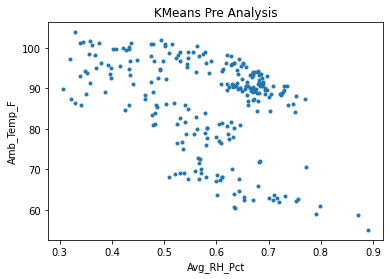

In [5]:
# Plot data to get an insight, what model can fit here?
%matplotlib inline
#df[["Amb_Temp_F","Avg_RH_Pct"]].hist(figsize=(18,5))
colX="Avg_RH_Pct"
colY="Amb_Temp_F"
#colX, colY = colY, colX

plt.plot(df[colX],
         df[colY],
         '.')
plt.xlabel(df[colX].name)
plt.ylabel(df[colY].name)
plt.title("KMeans Pre Analysis")




In [6]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(200, 4) (200,)
(51, 4) (51,)


In [7]:
# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = model.predict(X_test)

Text(0, 0.5, 'Predictions')

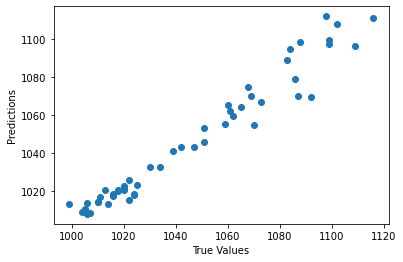

In [8]:
## The line / model
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [9]:
#d=y_test-predictions
y_test.values-predictions

array([-13.79677291,   1.64464436,  -7.7159121 ,   5.07231955,
         2.54580224,  -1.16323611,  -1.72067274,   3.75382768,
         1.40865624,  12.67687354,   5.18974087,  -6.55953194,
        -5.68020482,  -3.64865376,  -1.27507214,  22.83851367,
         5.45232365,  15.20611634, -14.19609446,   1.53525164,
        -2.0611419 ,  -2.78174108,  -0.42722563,   5.97265881,
        -4.84828009, -10.50043143,   6.99707688,  -2.26394111,
         6.67511025,   0.60623887,   3.68770135,  -1.13949656,
        -0.89199588,  -2.007171  ,   0.78126916,  -7.4302008 ,
        -5.95767849,  -2.26101143,  -5.05958122,   6.24172847,
        -2.37396024,  -2.92012524,  -0.23815193,  -2.52738146,
       -10.78485484,  -4.26525354,  17.28113355,  -5.53129002,
        -4.57422251,  -6.10671835,  -2.0784395 ])

In [10]:
df=df.drop(columns="Base_hours")
df

,Amb_Temp_F,Avg_RH_Pct,Comp_eff
0,80.70,0.6210,85.700
1,81.60,0.6280,85.700
2,78.00,0.6310,85.700
3,81.00,0.4790,85.540
4,81.10,0.4830,85.570
...,...,...,...
270,60.69,0.6341,84.480
271,62.30,0.7090,84.230
272,62.79,0.7565,84.019
273,55.00,0.8900,84.010


In [11]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(200, 3) (200,)
(51, 3) (51,)


In [12]:
# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = model.predict(X_test)

Text(0, 0.5, 'Predictions')

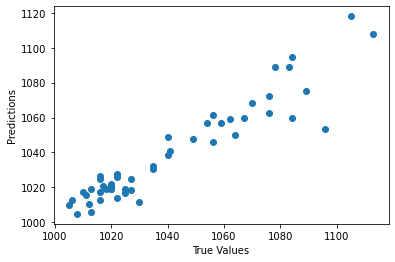

In [13]:
## The line / model
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [14]:
type(predictions)
predictions=predictions.astype(int)
np.dstack((y_test.values,predictions,(y_test.values-predictions)))

array([[[1041, 1040,    1],
        [1022, 1027,   -5],
        [1020, 1018,    2],
        [1076, 1072,    4],
        [1022, 1025,   -3],
        [1089, 1075,   14],
        [1105, 1118,  -13],
        [1040, 1048,   -8],
        [1064, 1049,   15],
        [1025, 1016,    9],
        [1076, 1062,   14],
        [1020, 1019,    1],
        [1067, 1059,    8],
        [1040, 1038,    2],
        [1056, 1061,   -5],
        [1035, 1030,    5],
        [1049, 1047,    2],
        [1020, 1021,   -1],
        [1017, 1020,   -3],
        [1084, 1094,  -10],
        [1011, 1015,   -4],
        [1016, 1017,   -1],
        [1016, 1024,   -8],
        [1030, 1011,   19],
        [1078, 1088,  -10],
        [1020, 1020,    0],
        [1016, 1012,    4],
        [1016, 1026,  -10],
        [1056, 1045,   11],
        [1013, 1019,   -6],
        [1008, 1004,    4],
        [1020, 1019,    1],
        [1083, 1089,   -6],
        [1027, 1024,    3],
        [1006, 1012,   -6],
        [1113, 1107,

In [15]:
np.average((y_test.values-predictions))

2.4705882352941178